In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random

In [12]:
def find_files(directory, filename):
    """
    Search for files with a specific name within all subdirectories of a given directory.

    Parameters:
        directory (str): The root directory from which to start the search.
        filename (str): The name of the file to search for.

    Returns:
        list: A list of full paths to the files that match the given filename.
    """
    matches = []  # List to store the full paths of matching files
    for root, dirs, files in os.walk(directory):
        if filename in files:
            full_path = os.path.join(root, filename)
            matches.append(full_path)
    return matches

# Usage example
root_directory = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/'  # Update this to the directory you want to search
target_filename = 'notadj_qvalues_full_genome.csv'
notadj_qvalues_files = find_files(root_directory, target_filename)

In [13]:
# Function to load data from a pickle file
def load_datav1(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return set(data['V1'])

In [14]:
# Function to load data from a pickle file
def load_datav2(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return set(data['V2'])

In [15]:
## retrieve all no adjusted transposed pvalues
target_filename = 'significant_snps.pkl'
significant_snps_files = find_files(root_directory, target_filename)

In [16]:
len(significant_snps_files)

101

In [17]:
significant_snps_files[1]

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_82/significant_snps.pkl'

In [18]:
snps_file = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/significant_snps.pkl'

In [19]:
snpsv1 = load_datav1(snps_file)

In [20]:
snpsv2 = load_datav2(snps_file)

In [21]:
## retrieve all no adjusted transposed pvalues
target_filename = 'effect_sizes_simple_full_genome.csv'
effect_sizes_simple_full_genome_files = find_files(root_directory, target_filename)

In [22]:
es = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/effect_sizes_simple_full_genome.csv')

In [23]:
es_selv1 = es[es['Unnamed: 0'].isin(snpsv1)]['V1']

In [24]:
es_selv2 = es[es['Unnamed: 0'].isin(snpsv2)]['V2']

In [25]:
es_selv1

4163      -0.067656
4168      -0.061710
19041     -0.053303
19828     -0.052597
19866      0.084613
             ...   
3214381    0.054381
3230002   -0.088371
3230043   -0.088606
3233732    0.035305
3234167    0.025734
Name: V1, Length: 682, dtype: float64

In [26]:
env = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/environment_lea_full_genome.csv')

In [27]:
new_env = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/testing_environment_lea_full_genome.csv')

In [28]:
new_env = new_env['bio1']

In [29]:
with open('splits_samples.pkl', 'rb') as file:
    # Load data from the file
    splits_samples = pickle.load(file)

In [30]:
test_samples = splits_samples[0][1]

path_all_af_indexed = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/baypass_terminal/merged_hapFIRE_allele_frequency_indexed.csv'
allele_freq = dd.read_csv(path_all_af_indexed, sep = ',', usecols=test_samples)
allele_freq = allele_freq.compute() 

In [55]:
snpsv1 - 1 

TypeError: unsupported operand type(s) for -: 'set' and 'int'

In [50]:
    snps_0index = snps_indices_bio1['x'] - 1 
    
    snps_0index = snps_0index.to_list()

{4164,
 4169,
 19042,
 19829,
 19867,
 19878,
 19890,
 19937,
 21394,
 21399,
 21408,
 21434,
 21441,
 26683,
 26719,
 26750,
 26767,
 26774,
 33655,
 36445,
 36452,
 36496,
 36497,
 36498,
 36499,
 36500,
 36501,
 36502,
 36503,
 36507,
 36508,
 36509,
 36510,
 36511,
 36512,
 36515,
 36516,
 36518,
 36519,
 36521,
 36522,
 36523,
 36524,
 36526,
 36527,
 36528,
 36532,
 36545,
 36546,
 36547,
 36550,
 36556,
 36557,
 36558,
 36559,
 36566,
 36567,
 36571,
 36574,
 36575,
 36576,
 36578,
 36588,
 36590,
 36591,
 36593,
 36595,
 36596,
 36597,
 36598,
 36599,
 36600,
 36601,
 36603,
 36606,
 36607,
 36608,
 36610,
 36622,
 36623,
 36624,
 36625,
 36626,
 36628,
 36629,
 36631,
 36632,
 36633,
 36634,
 36635,
 36636,
 36639,
 36878,
 38659,
 45089,
 45092,
 45093,
 45095,
 45096,
 46441,
 47449,
 47798,
 47800,
 53263,
 53293,
 53325,
 55946,
 56033,
 56048,
 57281,
 57559,
 57901,
 77830,
 78923,
 78924,
 78938,
 78988,
 78989,
 78995,
 78998,
 78999,
 79003,
 79004,
 79016,
 79017,
 7

In [51]:
snps_0index = pd.Series(list(snpsv1)) - 1 

In [52]:
snps_0index

0      1124355
1        77829
2      1783814
3       993292
4        36877
        ...   
677    2891750
678     243694
679     495599
680    1124339
681    3194873
Length: 682, dtype: int64

In [32]:
allele_freq = allele_freq.reset_index(drop=True)

allele_freq_sel = allele_freq.iloc[snps_0index,:]

In [33]:
allele_freq_sel

,4_1_4,4_3_1,4_3_2,4_3_3,4_3_5,4_3_6,4_3_7,4_3_8,4_3_9,4_3_10,...,57_3_4,57_3_6,57_3_7,57_3_9,57_3_10,57_3_12,57_3_13,57_3_15,57_3_16,57_3_18
1124355,0.328655,0.311978,0.247894,0.118344,0.110042,0.217802,0.049451,0.046362,0.201238,0.088338,...,0.366748,0.429689,0.390597,0.003898,0.396775,0.136270,0.597386,0.008847,0.339498,0.246919
77829,0.131144,0.023607,0.036330,0.029637,0.034342,0.046369,0.026579,0.028554,0.163037,0.010016,...,0.172218,0.099310,0.100375,0.001824,0.186907,0.002071,0.142038,0.258304,0.118217,0.019673
1783814,0.146439,0.138835,0.111537,0.062196,0.090977,0.042613,0.030873,0.092689,0.053821,0.055264,...,0.059995,0.049018,0.026235,0.002251,0.002086,0.002244,0.007008,0.001227,0.018366,0.025506
993292,0.067777,0.022833,0.006171,0.005400,0.007283,0.009625,0.047297,0.004585,0.005979,0.001293,...,0.028316,0.024692,0.020429,0.001907,0.004512,0.005108,0.014741,0.674079,0.036436,0.005231
36877,0.089699,0.011681,0.011076,0.007846,0.044872,0.015027,0.006094,0.005632,0.019590,0.002093,...,0.277425,0.099295,0.060515,0.991434,0.001844,0.175191,0.034299,0.002099,0.037592,0.144636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891750,0.152010,0.287472,0.147153,0.557082,0.550880,0.407482,0.518312,0.549763,0.421220,0.679574,...,0.085423,0.059618,0.102518,0.002293,0.004653,0.031324,0.015288,0.308224,0.248307,0.009827
243694,0.084903,0.018997,0.009848,0.007718,0.009858,0.014687,0.081252,0.006786,0.009478,0.002639,...,0.302634,0.053815,0.124333,0.992259,0.592899,0.833037,0.052034,0.552626,0.055985,0.142805
495599,0.154742,0.131985,0.129967,0.059356,0.042909,0.057835,0.073557,0.016291,0.051398,0.005424,...,0.208342,0.299087,0.161188,0.001401,0.004621,0.003495,0.032041,0.179734,0.042522,0.287573
1124339,0.293212,0.309132,0.245368,0.112384,0.078755,0.206367,0.048432,0.045155,0.199500,0.086781,...,0.372089,0.444193,0.378360,0.003898,0.396817,0.136205,0.597767,0.008847,0.344169,0.247512


In [34]:
allele_freq_sel = allele_freq_sel.sort_index()

In [35]:
allele_freq_sel.shape # (682, 287)

es_selv1.shape # (682,)

(682,)

In [36]:
es_selv1 = np.array(es_selv1)

In [37]:
es_selv1.shape

(682,)

In [38]:
new_env = np.array(new_env)

In [39]:
new_env.shape

(68,)

In [40]:
result_matrix = np.outer(new_env, es_selv1.T)

In [41]:
result_matrix.shape

(68, 682)

In [129]:
result_matrix = pd.DataFrame(result_matrix)

In [ ]:
result_matrix.columns = allele_freq_sel_tr.columns

In [ ]:
result_matrix

In [ ]:
# Calculate the correlation between corresponding columns
correlations = {}
for column in allele_freq_sel_tr.columns:
    if column in result_matrix.columns:
        correlations[column] = allele_freq_sel_tr[column].corr(result_matrix[column])

# Print the results
for col, corr in correlations.items():
    print(f'Correlation between columns {col} of df1 and df2 is: {corr:.2f}')

In [42]:
## get the vcf file frothe chromosomes and positions 
import allel
## ld pruned vcf file
vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1.recode.vcf'
vcf = allel.read_vcf(vcf_file)

In [ ]:
variants = vcf['calldata/GT']

genotype_counts = np.sum(variants, axis=2)

In [45]:
genotype_counts.shape

(3235480, 231)

In [46]:
genotype_counts = pd.DataFrame(genotype_counts)

In [47]:
genotype_counts

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235475,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3235476,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3235477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3235478,2,0,0,2,2,2,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [48]:
#genotype_counts.to_csv('genotype_counts_fullgenome231ecotypes.csv')

In [49]:
snps_0index

0      1124355
1        77829
2      1783814
3       993292
4        36877
        ...   
677    2891750
678     243694
679     495599
680    1124339
681    3194873
Length: 682, dtype: int64

In [132]:
genotype_counts_filt = genotype_counts.iloc[snps_0index.to_list(), :]

In [133]:
snps_0index.sort_values()

34        4163
36        4168
185      19041
467      19828
477      19866
        ...   
352    3214381
112    3230002
128    3230043
665    3233732
131    3234167
Length: 682, dtype: int64

In [134]:
genotype_counts_filt

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
1124355,2,0,0,2,2,0,2,2,0,2,...,2,0,2,0,0,0,0,0,0,0
77829,2,0,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,2,0,0,0
1783814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
993292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
36877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
243694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495599,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1124339,2,0,0,2,2,0,2,2,0,2,...,2,0,2,0,0,0,0,0,0,0


In [135]:
genotype_counts_filt.shape

(682, 231)

In [140]:
genotype_counts_filt

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
1124355,2,0,0,2,2,0,2,2,0,2,...,2,0,2,0,0,0,0,0,0,0
77829,2,0,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,2,0,0,0
1783814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
993292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
36877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
243694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495599,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1124339,2,0,0,2,2,0,2,2,0,2,...,2,0,2,0,0,0,0,0,0,0


In [142]:
y.dtype

dtype('float64')

In [ ]:
y.shape # (682,)

genotype_counts_filt.shape # (682, 231)


type(genotype_counts_filt) # pandas.core.frame.DataFrame

In [148]:
genotype_counts_array.shape

(682, 231)

In [149]:
y.shape

(682,)

In [ ]:
result_matrix

In [147]:
import numpy as np
import cvxpy as cp

## just select the frist sample
first_sample = result_matrix.iloc[0,:]

y = np.asarray(first_sample) * 2

h = cp.Variable(231)

genotype_counts_array = genotype_counts_filt.to_numpy()

product = genotype_counts_array @ h 

diff = product - y

constraints = [0 <= h, sum(h) == 1]

problem = cp.Problem(cp.Minimize(cp.norm(diff)), constraints)

# Solve the optimization problem using the SCS solver, with verbose output disabled.
problem.solve(solver='SCS', verbose=False,eps=1e-6)

h.value.shape

(231,)

In [129]:
ecotype_frequency = h.value

In [137]:
ecotype_frequency.round(3)

array([-0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
        0.057,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.313,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,
       -0.   ,  0.   ,  0.   ,  0.169,  0.   , -0.   ,  0.062,  0.   ,
       -0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.003,  0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,
        0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.065,
        0.   , -0.   ,  0.092,  0.062, -0.   ,  0.033, -0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.019, -0.   ,  0.   , -0.   , -0.   ,
        0.   , -0.   ,  0.   ,  0.037,  0.   ,  0.   ,  0.   , -0.   ,
        0.   , -0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,
       -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,
      

In [ ]:
ecotype_frequency

In [141]:
len(test_samples)

68

In [149]:
test_samples[0]

'4_1_4'

In [ ]:
path_ecotypes = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_ecotype_frequency.txt'
e_freq = pd.read_csv(path_ecotypes, sep = '\t')

In [169]:
e_freq

,1_1_1,1_1_2,1_1_3,1_1_4,1_1_5,1_1_6,1_1_7,1_1_8,1_1_9,1_1_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,0.001811,0.002972,0.002207,0.002224,0.003074,0.003125,0.003698,0.003377,0.002642,0.003054,...,0.003659,0.000256,0.000624,0.000184,0.002196,0.002055,0.000591,0.000806,0.000442,0.003642
1,0.001071,0.001051,0.008073,0.001294,0.001269,0.001334,0.001040,0.001246,0.001428,0.009924,...,0.000774,0.039458,0.000258,0.000425,0.000258,0.001056,0.001835,0.001006,0.000412,0.000498
2,0.001294,0.000480,0.000686,0.003762,0.000684,0.000590,0.000690,0.000823,0.000884,0.000855,...,0.000130,0.000262,0.000044,0.000381,0.000348,0.000103,0.000105,0.000682,0.000000,0.000159
3,0.000633,0.000904,0.000778,0.001123,0.003116,0.000758,0.001274,0.000965,0.000845,0.001196,...,0.000538,0.000199,0.000067,0.000222,0.000105,0.002007,0.001271,0.000711,0.000329,0.000220
4,0.000470,0.003701,0.000602,0.001019,0.020989,0.000568,0.001291,0.000875,0.000778,0.001077,...,0.000544,0.000299,0.000011,0.000055,0.000243,0.014905,0.001369,0.000274,0.000269,0.000201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.000740,0.005775,0.000711,0.001752,0.001607,0.004514,0.003806,0.008937,0.003141,0.005110,...,0.000687,0.000584,0.000467,0.000883,0.000740,0.003744,0.014624,0.001323,0.001993,0.000467
227,0.002256,0.006301,0.002735,0.003294,0.002891,0.003263,0.003535,0.008204,0.002187,0.002397,...,0.001777,0.000376,0.000467,0.000274,0.001367,0.003442,0.000774,0.000662,0.000322,0.000692
228,0.000729,0.000928,0.000756,0.000853,0.000843,0.001579,0.000766,0.001570,0.001097,0.002119,...,0.000598,0.000548,0.000387,0.020064,0.000498,0.000717,0.001437,0.000646,0.000552,0.000684
229,0.000732,0.000727,0.000840,0.000913,0.000612,0.000719,0.000620,0.000707,0.000707,0.000781,...,0.000455,0.000657,0.000294,0.000416,0.000331,0.000520,0.000639,0.000586,0.000195,0.000362


In [155]:
e_freq['4_1_4'].corr(pd.Series(ecotype_frequency))

0.008976398444053926

In [107]:
allele_freq_seltr = allele_freq_sel.T

In [ ]:
x.pred <- scale(y[,candidates], scale = F) %*% matrix(b.estimates[candidates])

In [110]:
# Scale y using mean centering (since scale=False in R translates to no scaling in Python)
x_pred = (allele_freq_seltr - allele_freq_seltr.mean()) @ np.array([es_sel]).T

In [114]:
x_pred_norm = (x_pred - np.mean(x_pred)) / np.std(x_pred)

In [118]:
sns.lmplot(x = env['bio1'].reset_index(drop=True), y = x_pred_norm[0].reset_index(drop=True))

TypeError: Missing required keyword argument `data`.

In [117]:
import statsmodels.api as sm

# Assuming env['bio1'] and x_pred_norm[0] are your independent and dependent data respectively
X = env['bio1'].reset_index(drop=True)
y = x_pred_norm[0].reset_index(drop=True)

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model to get R-squared and other statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     131.7
Date:                Tue, 21 May 2024   Prob (F-statistic):           2.55e-25
Time:                        09:19:53   Log-Likelihood:                -352.71
No. Observations:                 287   AIC:                             709.4
Df Residuals:                     285   BIC:                             716.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.063e-17      0.049  -6.25e-16      1.0

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshape data for scikit-learn if it's in Series or 1D array format
X = env['bio1'].reset_index(drop=True).values.reshape(-1, 1)
y = x_pred_norm[0].reset_index(drop=True).values.reshape(-1, 1)

# Create a linear regression model object
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.3161173475627631


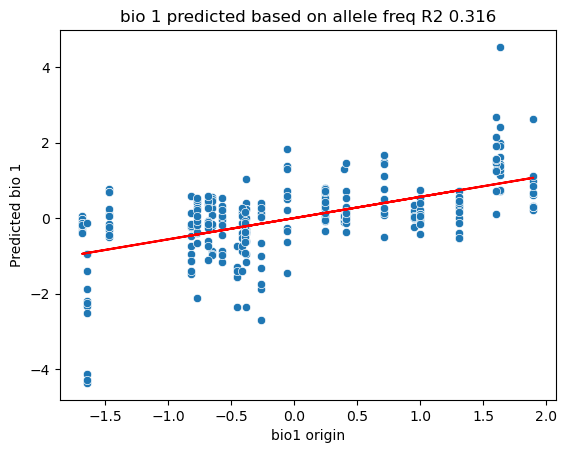

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x=env['bio1'].reset_index(drop=True), y=x_pred_norm[0].reset_index(drop=True))

# Line plot for the regression
plt.plot(X, y_pred, color='red')  # regression line

# Display the plot
plt.xlabel('bio1 origin')
plt.ylabel('Predicted bio 1')
plt.title('bio 1 predicted based on allele freq R2 0.316')
plt.show()

In [ ]:
## not test samples

In [125]:
test_samples = splits_samples[0][1]

path_all_af_indexed = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/baypass_terminal/merged_hapFIRE_allele_frequency_indexed.csv'
allele_freq_test = dd.read_csv(path_all_af_indexed, sep = ',', usecols=test_samples)
allele_freq_test = allele_freq_test.compute() 

In [127]:
allele_freq_test = allele_freq_test.reset_index(drop=True)

allele_freq_test_sel = allele_freq_test.iloc[snps_0index,:]

In [128]:
allele_freq_test_sel = allele_freq_test_sel.sort_index()

In [131]:
allele_freq_test_sel.shape # (682, 287)

(682, 68)

In [132]:
es_sel.shape # (682,)

(682,)

In [133]:
allele_freq_test_seltr = allele_freq_test_sel.T

In [134]:
# Scale y using mean centering (since scale=False in R translates to no scaling in Python)
x_pred_test = (allele_freq_test_seltr - allele_freq_test_seltr.mean()) @ np.array([es_sel]).T

In [140]:
env_test = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/testing_environment_lea_full_genome.csv')

In [142]:
env_test['bio1']

0     0.874491
1     0.874491
2     0.874491
3     0.874491
4     0.874491
        ...   
63   -0.435837
64   -0.435837
65   -0.435837
66   -0.435837
67   -0.435837
Name: bio1, Length: 68, dtype: float64

In [143]:
x_pred_test_norm = (x_pred_test - np.mean(x_pred_test)) / np.std(x_pred_test)

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshape data for scikit-learn if it's in Series or 1D array format
X = env_test['bio1'].reset_index(drop=True).values.reshape(-1, 1)
y = x_pred_test_norm[0].reset_index(drop=True).values.reshape(-1, 1)

# Create a linear regression model object
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.08894939049158213


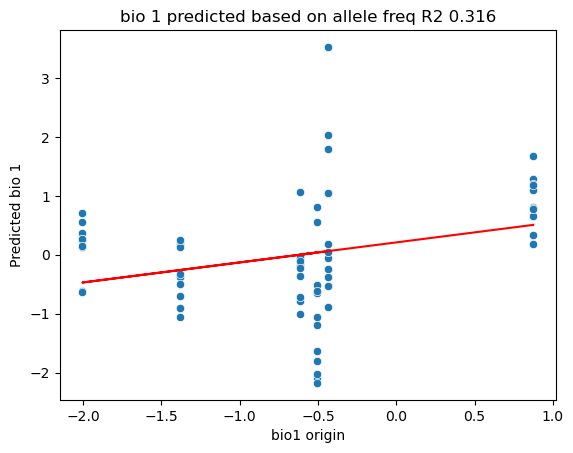

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x=env_test['bio1'].reset_index(drop=True), y=x_pred_test_norm[0].reset_index(drop=True))

# Line plot for the regression
plt.plot(X, y_pred, color='red')  # regression line

# Display the plot
plt.xlabel('bio1 origin')
plt.ylabel('Predicted bio 1')
plt.title('bio 1 predicted based on allele freq R2 0.316')
plt.show()

In [147]:
es_sel

4163      -1.810627
4168      -1.810452
19041     -1.936931
19828     -1.967681
19866      1.384861
             ...   
3214381    2.437002
3230002   -1.339698
3230043   -1.361869
3233732    3.230929
3234167    4.730627
Name: x, Length: 682, dtype: float64

In [155]:
env_test['bio1'].to_csv('X_values.csv')

In [156]:
es_sel.to_csv('es_sel.csv')

In [159]:
pd.read_csv('X.csv')

,Unnamed: 0,bio1
0,0,0.874491
1,1,0.874491
2,2,0.874491
3,3,0.874491
4,4,0.874491
...,...,...
63,63,-0.435837
64,64,-0.435837
65,65,-0.435837
66,66,-0.435837


In [ ]:
env_test['bio1'].shape # (68,)

es_sel.shape # (682,)

In [152]:
env_test['bio1'].to_csv('X.csv')
es_sel.to_csv('es_sel.csv')

In [163]:
allele_freq_test_seltr.shape # (68, 682)

(68, 682)

In [146]:
import numpy as np

# Given x_pred_test and es_sel
X = env_test['bio1'] # This is the known predicted values matrix/vector
B = np.array([es_sel]).T  # The es_sel matrix as earlier

# Calculate the pseudo-inverse of B if direct inversion isn't possible
B_pinv = np.linalg.pinv(B)

# Assuming mean of A can be approximated or is known

# Calculate A
A = X @ B_pinv 


Exception: Dot product shape mismatch, (68,) vs (1, 682)

In [149]:
B_pinv.shape

(1, 682)

In [57]:
firstmethod = pd.read_csv('firstmethod.csv')

In [58]:
af = pd.read_csv('af.csv')

In [59]:
stmethod = pd.read_csv('secondmethod.csv')

In [60]:
train_samples = splits_samples[0][0]

In [61]:
site = pd.Series(train_samples).str.split('_').str[0]

In [62]:
firstmethod['site'] = site
af['site'] = site
stmethod['site'] = site

In [63]:
stmethod.round(4) == firstmethod.round(4)

,Unnamed: 0,V1,V2,V3,site
0,True,False,False,False,True
1,True,False,False,False,True
2,True,False,False,False,True
3,True,False,False,False,True
4,True,False,False,False,True
...,...,...,...,...,...
282,True,False,False,False,True
283,True,False,False,False,True
284,True,False,False,False,True
285,True,False,False,False,True


In [64]:
firstmethod

,Unnamed: 0,V1,V2,V3,site
0,1,0.062686,0.426797,0.157628,1
1,2,0.062686,0.426797,0.157628,1
2,3,0.062686,0.426797,0.157628,1
3,4,0.062686,0.426797,0.157628,1
4,5,0.062686,0.426797,0.157628,1
...,...,...,...,...,...
282,283,0.160933,0.590753,0.274733,60
283,284,0.160933,0.590753,0.274733,60
284,285,0.160933,0.590753,0.274733,60
285,286,0.160933,0.590753,0.274733,60


In [65]:
stmethod == firstmethod

,Unnamed: 0,V1,V2,V3,site
0,True,False,False,False,True
1,True,False,False,False,True
2,True,False,False,False,True
3,True,False,False,False,True
4,True,False,False,False,True
...,...,...,...,...,...
282,True,False,False,False,True
283,True,False,False,False,True
284,True,False,False,False,True
285,True,False,False,False,True


In [66]:
firstmethod

,Unnamed: 0,V1,V2,V3,site
0,1,0.062686,0.426797,0.157628,1
1,2,0.062686,0.426797,0.157628,1
2,3,0.062686,0.426797,0.157628,1
3,4,0.062686,0.426797,0.157628,1
4,5,0.062686,0.426797,0.157628,1
...,...,...,...,...,...
282,283,0.160933,0.590753,0.274733,60
283,284,0.160933,0.590753,0.274733,60
284,285,0.160933,0.590753,0.274733,60
285,286,0.160933,0.590753,0.274733,60


In [67]:
af['V1'].corr(firstmethod['V1'])

0.39320550928211057

In [68]:
af['V2'].corr(firstmethod['V2'])

0.30199250364641994

In [69]:
firstmethod['V1'].mean()

0.10051584443409749

In [70]:
firstmethod['V2'].mean()

0.48992743272898676

<Axes: xlabel='V1', ylabel='V1'>

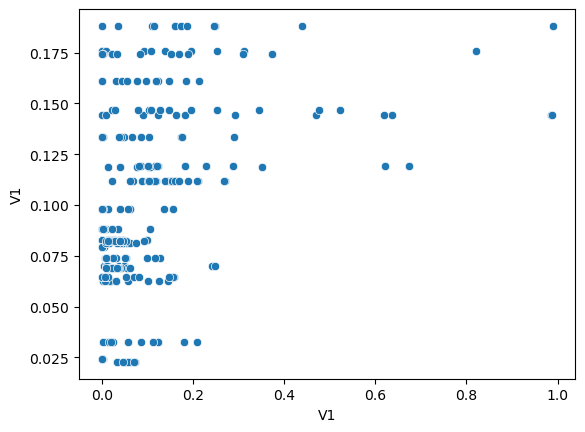

In [71]:
sns.scatterplot(x = af['V1'], y = firstmethod['V1'])

<Axes: xlabel='V2', ylabel='V2'>

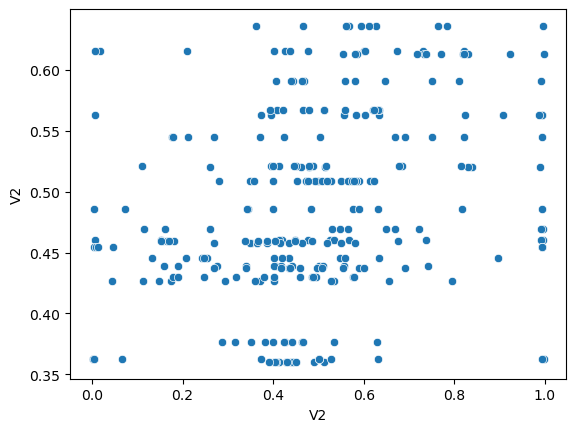

In [72]:
sns.scatterplot(x = af['V2'], y = firstmethod['V2'])

<Axes: xlabel='V3', ylabel='V3'>

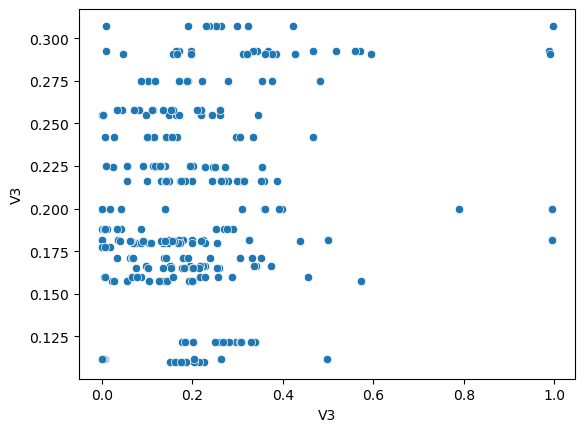

In [73]:
sns.scatterplot(x = af['V3'], y = firstmethod['V3'])

In [10]:
firstmethod.groupby('site')[['V1','V2', 'V3']].mean() - af.groupby('site')[['V1','V2', 'V3']].mean()

,V1,V2,V3
site,,,
1,-0.084658,-0.431177,-0.204263
10,-0.086391,-0.324700,-0.300962
11,-0.051817,-0.482092,-0.348990
12,-0.029453,-0.584693,-0.130722
13,-0.052167,-0.632753,-0.273323
2,-0.091711,-0.594554,-0.191936
23,-0.130620,-0.564255,-0.275705
25,-0.091066,-0.462034,-0.265862
26,-0.158692,-0.480631,-0.209482


In [11]:
stmethod.groupby('site')[['V1','V2', 'V3']].mean() - af.groupby('site')[['V1','V2', 'V3']].mean()

,V1,V2,V3
site,,,
1,-0.084658,-0.431177,-0.204263
10,-0.086391,-0.324700,-0.300962
11,-0.051817,-0.482092,-0.348990
12,-0.029453,-0.584693,-0.130722
13,-0.052167,-0.632753,-0.273323
2,-0.091711,-0.594554,-0.191936
23,-0.130620,-0.564255,-0.275705
25,-0.091066,-0.462034,-0.265862
26,-0.158692,-0.480631,-0.209482


In [ ]:
vv